In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from mplsoccer import Pitch, add_image, FontManager
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import matplotlib.image as mpimg
from pywaffle import Waffle
from highlight_text import fig_text

In [3]:
team = "Barcelona"

cate = {0: 'MemberHome',
        1: 'MemberAway',
        2: 'MatchStats',
        3: 'SummaryHome',
        4: 'PassingHome',
        5: 'PassTypesHome',
        6: 'DefensiveHome',
        7: 'PossessionHome',
        8: 'MiscellaneousHome',
        9: 'GoalkeeperHome',
        10: 'SummaryAway',
        11: 'PassingAway',
        12: 'PassTypesAway',
        13: 'DefensiveAway', 
        14: 'PossessiongAway',
        15: 'MiscellaneousAway',
        16: 'GoalkeeperAway',
        17: 'Shots'}

category = cate[7]
categoryAway = cate[14]

sc2021 = pd.read_csv(f'/work/assets/fbref/teamStats/barcelona/match/2021/#12/{category}.csv') # sociedad
bil2021 = pd.read_csv(f"/work/assets/fbref/teamStats/barcelona/match/2021/#17/{categoryAway}.csv") # bilbao
ge2021 = pd.read_csv(f'/work/assets/fbref/teamStats/barcelona/match/2021/#31/{category}.csv') # getafe
list2021 = [sc2021,bil2021,ge2021]

sc2122 = pd.read_csv(f'/work/assets/fbref/teamStats/barcelona/match/2122/#1/{category}.csv') # sociedad 
bil2122 = pd.read_csv(f"/work/assets/fbref/teamStats/barcelona/match/2122/#2/{categoryAway}.csv") # bilbao
ge2122 = pd.read_csv(f'/work/assets/fbref/teamStats/barcelona/match/2122/#3/{category}.csv') # getafe
list2122 = [sc2122,bil2122,ge2122]

In [4]:
df2021 = pd.concat(list2021)
df2122 = pd.concat(list2122)
print("2021: ",df2021.columns.tolist())
print("+++++++++++++++++++")
print("2122: ",df2122.columns.tolist())


2021:  ['Unnamed: 0', 'Player', '#', 'Nation', 'Pos', 'Age', 'Min', 'Touches_Touches', 'Def Pen_Touches', 'Def 3rd_Touches', 'Mid 3rd_Touches', 'Att 3rd_Touches', 'Att Pen_Touches', 'Live_Touches', 'Succ_Dribbles', 'Att_Dribbles', 'Succ%_Dribbles', '#Pl_Dribbles', 'Megs_Dribbles', 'Carries_Carries', 'TotDist_Carries', 'PrgDist_Carries', 'Prog_Carries', '1/3_Carries', 'CPA_Carries', 'Mis_Carries', 'Dis_Carries', 'Targ_Receiving', 'Rec_Receiving', 'Rec%_Receiving', 'Prog_Receiving']
+++++++++++++++++++
2122:  ['Unnamed: 0', 'Player', '#', 'Nation', 'Pos', 'Age', 'Min', 'Touches_Touches', 'Def Pen_Touches', 'Def 3rd_Touches', 'Mid 3rd_Touches', 'Att 3rd_Touches', 'Att Pen_Touches', 'Live_Touches', 'Succ_Dribbles', 'Att_Dribbles', 'Succ%_Dribbles', '#Pl_Dribbles', 'Megs_Dribbles', 'Carries_Carries', 'TotDist_Carries', 'PrgDist_Carries', 'Prog_Carries', '1/3_Carries', 'CPA_Carries', 'Mis_Carries', 'Dis_Carries', 'Targ_Receiving', 'Rec_Receiving', 'Rec%_Receiving', 'Prog_Receiving']


In [5]:
df2021 = df2021[(df2021["Player"]!="15 Players")&(df2021["Player"]!="13 Players")]
df2122 = df2122[(df2122["Player"]!="15 Players")&(df2122["Player"]!="13 Players")]

df2021.head()
# df2122.head()

,Unnamed: 0,Player,#,Nation,Pos,Age,Min,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,...,PrgDist_Carries,Prog_Carries,1/3_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Targ_Receiving,Rec_Receiving,Rec%_Receiving,Prog_Receiving
0,0,Lionel Messi,10.0,ar ARG,FW,33-175,90,83,0,9,...,278,15,5,2,2,2,84,70,83.3,5
1,1,Martin Braithwaite,9.0,dk DEN,LW,29-194,90,42,1,5,...,81,4,0,1,0,3,53,37,69.8,11
2,2,Antoine Griezmann,7.0,fr FRA,RW,29-270,65,40,0,2,...,79,3,1,0,1,0,43,33,76.7,6
3,3,Francisco Trincão,17.0,pt POR,RW,20-353,25,17,2,9,...,59,0,0,0,0,1,13,11,84.6,2
4,4,Pedri,16.0,es ESP,AM,18-021,73,47,1,6,...,117,8,2,0,2,0,51,37,72.5,4


In [6]:
sortCol = "Touches_Touches"
df2021 = df2021.sort_values(by=[sortCol], ascending=False)
df2021.head()

,Unnamed: 0,Player,#,Nation,Pos,Age,Min,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,...,PrgDist_Carries,Prog_Carries,1/3_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Targ_Receiving,Rec_Receiving,Rec%_Receiving,Prog_Receiving
12,12,Óscar Mingueza,28.0,es ESP,CB,21-344,74,128,6,41,...,234,8,1,0,0,0,116,114,98.3,1
6,6,Sergi Roberto,20.0,es ESP,WB,29-074,63,113,2,17,...,122,6,1,0,0,0,90,87,96.7,8
4,4,Sergio Busquets,5.0,es ESP,DM,32-280,90,113,3,21,...,125,8,2,0,0,0,101,94,93.1,0
3,3,Frenkie de Jong,21.0,nl NED,"CB,CM",23-345,90,107,2,32,...,141,3,3,0,0,2,98,89,90.8,3
7,7,Jordi Alba,18.0,es ESP,LB,31-291,90,107,1,26,...,160,9,4,1,0,1,83,82,98.8,12


In [7]:
df2021.drop(columns=["Unnamed: 0"],inplace=True)
df2122.drop(columns=["Unnamed: 0"],inplace=True)

In [55]:
img = mpimg.imread('/work/assets/image/barcelona.png')
image = Image.open('/work/assets/image/barcelona.png')

def plot_waffle(df,opponent):
    df = df[["Player","Def Pen_Touches","Def 3rd_Touches","Mid 3rd_Touches","Att 3rd_Touches","Att Pen_Touches"]]    
    df.reset_index(inplace=True,drop=True)
    labelList = df.loc[0:,"Player"]
    
    fig = plt.figure(
        FigureClass=Waffle, 
        rows=10,
        columns=10,
        figsize=(10,10),
        plots={
            '341':{
                'values':df.iloc[1,1:],
                'title':{
                    'label':labelList[1],
                    'color':'white',
                    'loc':'left',
                    'fontsize':15},          
            },
            '342':{
                'values':df.iloc[2,1:],
                'title':{
                    'label':labelList[2],
                    'color':'white',
                    'loc':'left',
                    'fontsize':15},
            },
            '343':{
                'values':df.iloc[3,1:],
                'title':{
                    'label':labelList[3],
                    'color':'white',
                    'loc':'left',
                    'fontsize':15},
            },
            '344':{
                'values':df.iloc[4,1:],
                'title':{
                    'label':labelList[4],
                    'color':'white',
                    'loc':'left',
                    'fontsize':15},            
            },
            '345':{
                'values':df.iloc[5,1:],
                'title':{
                    'label':labelList[5],
                    'color':'white',
                    'loc':'left',
                    'fontsize':15},            
            },
            '346':{
                'values':df.iloc[6,1:],
                'title':{
                    'label':labelList[6],
                    'color':'white',
                    'loc':'left',
                    'fontsize':15},            
            },
            '347':{
                'values':df.iloc[7,1:],
                'title':{
                    'label':labelList[7],
                    'color':'white',
                    'loc':'left',
                    'fontsize':15},            
            },
            '348':{
                'values':df.iloc[8,1:],
                'title':{
                    'label':labelList[8],
                    'color':'white',
                    'loc':'left',
                    'fontsize':15},            
            },
        },
        colors=('#7f5af0', '#4fc4cf', '#2cb67d', '#ff8906', '#ef4565')
    )
    add_image(image, fig, left=0.8, bottom=0.988, width=0.15)

    fig.suptitle(t=f"Area where {team} players touch the ball vs {opponent}",
                 x=0.394,y=1.1,color="#fffffe",fontsize=20, fontname="cmb10")

    fig.text(x=0.018,y=.96,s="data via Fbref",color="#fffffe",fontsize=15, fontname="cmb10")

    fig_text(
        s=f"<Def-pena> <Def-3rd> <Mid-3rd> <Att-3rd> <Att-pena>",
        x=0.015,
        y=.99,
        fontsize=18,
        fontname="cmb10",
        color='#fffffe',
        highlight_colors=['#7f5af0', '#4fc4cf', '#2cb67d', '#ff8906', '#ef4565']

    )
    fig.patch.set_facecolor('#131313')


0              Lionel Messi
1        Martin Braithwaite
2         Antoine Griezmann
3         Francisco Trincão
4                     Pedri
5            Miralem Pjanić
6           Frenkie de Jong
7           Sergio Busquets
8              Carles Aleñá
9                Jordi Alba
10           Óscar Mingueza
11          Clément Lenglet
12            Ronald Araújo
13             Sergiño Dest
14    Marc-André ter Stegen
15               15 Players
Name: Player, dtype: object


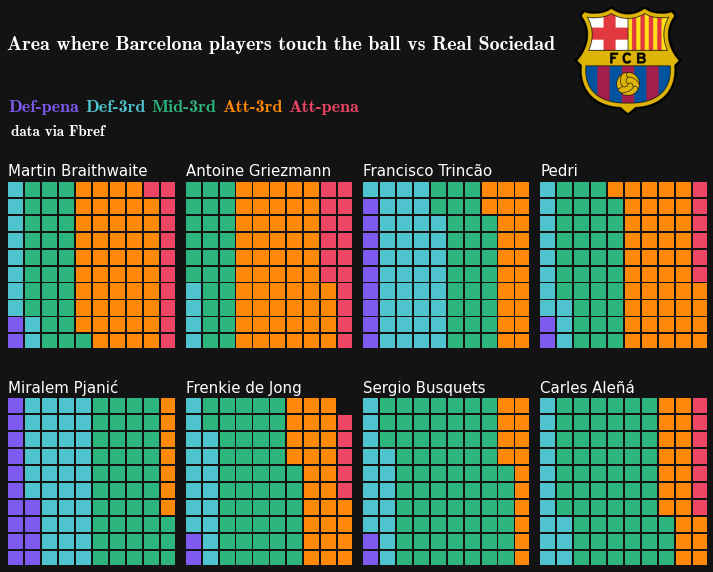

In [56]:
plot_waffle(sc2021,opponent="Real Sociedad")

In [44]:
df2021.groupby(by="Player").sum()

,#,Min,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Live_Touches,Succ_Dribbles,...,PrgDist_Carries,Prog_Carries,1/3_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Targ_Receiving,Rec_Receiving,Rec%_Receiving,Prog_Receiving
Player,,,,,,,,,,,,,,,,,,,,,
Antoine Griezmann,21.0,245,137,3,18,53,75,21,133,4,...,203,9,4,1,3,3,125,101,242.5,22
Carles Aleñá,6.0,24,14,0,2,9,3,1,14,0,...,31,0,0,0,0,1,13,11,84.6,1
Clément Lenglet,45.0,147,158,18,71,98,4,0,155,0,...,399,9,3,0,0,0,139,138,298.4,0
Francisco Trincão,34.0,52,35,2,11,14,15,2,35,5,...,105,3,1,0,1,1,33,28,169.6,5
Frenkie de Jong,63.0,270,251,6,68,150,57,9,245,4,...,500,21,6,0,3,5,216,199,277.4,8
Gerard Piqué,3.0,45,76,7,33,50,0,0,76,0,...,233,6,0,0,0,0,68,67,98.5,0
Ilaix,27.0,45,48,0,5,35,11,2,48,1,...,55,3,1,0,1,1,43,39,90.7,2
Jordi Alba,54.0,270,259,2,69,113,92,11,240,0,...,291,10,4,1,1,1,205,195,284.0,18
Lionel Messi,30.0,270,240,0,14,132,121,17,222,9,...,712,42,16,5,2,9,247,206,249.8,23


In [11]:
df2122.groupby(by="Player").sum()

,#,Min,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Live_Touches,Succ_Dribbles,...,PrgDist_Carries,Prog_Carries,1/3_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Targ_Receiving,Rec_Receiving,Rec%_Receiving,Prog_Receiving
Player,,,,,,,,,,,,,,,,,,,,,
16 Players,0.0,990,726,85,221,362,176,31,656,8,...,874,40,9,4,17,17,577,519,89.9,34
Antoine Griezmann,21.0,263,147,5,24,85,47,8,147,3,...,251,10,3,1,6,7,146,109,222.6,20
Clément Lenglet,30.0,91,109,4,45,71,1,0,107,0,...,265,7,0,0,0,0,88,88,200.0,0
Emerson,66.0,91,82,1,20,50,16,1,69,0,...,103,4,1,0,1,0,56,55,288.9,4
Eric García,48.0,171,157,31,85,76,3,0,153,0,...,254,11,1,0,0,0,123,121,196.7,0
Frenkie de Jong,63.0,250,224,7,47,150,46,8,219,3,...,625,33,7,0,4,3,184,170,273.3,13
Gavi Paez,30.0,17,20,1,3,11,9,2,20,0,...,59,6,0,2,0,2,20,14,70.0,2
Gerard Piqué,6.0,120,112,24,54,59,1,1,104,0,...,79,1,0,0,0,0,82,79,187.9,0
Jordi Alba,54.0,270,289,12,80,125,92,13,247,4,...,255,14,3,4,2,0,205,191,279.4,16
